In [792]:
import pandas as pd
import numpy as np
import re

In [793]:
url1="https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/users.csv"
url2="https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/swipes.csv"

In [794]:
users=pd.read_csv(url1)
# users.set_index("_id",inplace=True)

In [795]:
swipes=pd.read_csv(url2,low_memory=False)

In [796]:
users.head()

,_id,bio,college,country,createdAt,dob,email,face_detection_probabilities,gender,height,...,is_verified,mobile,name,status,type,updatedAt,verified_at,what_to_find,who_to_date,is_subscribed
0,0,I am very honest and caring person,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:23:18.004Z,2002-07-16T00:00:00.000Z,9000000000@get.idyll,[90.7028079032898],M,175.0,...,True,9000000000,Prakhar Sharma,True,U,2023-02-22T11:57:08.616Z,2023-02-22T11:57:04.347Z,C,F,True
1,1,Let's go on a date.,"[""Heritage ""]",IN,2023-02-07T05:44:15.450Z,1999-02-26T00:00:00.000Z,9100000000@get.idyll,[],M,177.0,...,True,9100000000,Amit,True,U,2023-02-21T18:07:44.286Z,2023-02-21T18:01:34.165Z,C,F,True
2,2,Loving life,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:57:29.233Z,2001-01-08T00:00:00.000Z,9200000000@get.idyll,[88.67224454879761],F,175.0,...,True,9200000000,Ritz,True,U,2023-02-14T10:33:13.373Z,NaN,R,M,True
3,3,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...,"[""Jawaharlal Nehru University""]",IN,2023-02-07T06:04:39.836Z,2000-08-20T00:00:00.000Z,9300000000@get.idyll,"[90.63367247581482,70.43942511081696,96.189951...",M,177.0,...,True,9300000000,Devesh Shukla,True,U,2023-02-26T20:28:11.956Z,NaN,R,F,True
4,4,🙄,"[""Jawaharlal Nehru University""]",IN,2023-02-07T07:05:14.605Z,2000-07-31T00:00:00.000Z,9400000000@get.idyll,NaN,M,178.0,...,False,9400000000,Aditya bhadoriya,True,U,2023-02-07T07:09:17.627Z,NaN,NS,A,NaN


In [797]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           1405 non-null   int64  
 1   bio                           1076 non-null   object 
 2   college                       1403 non-null   object 
 3   country                       1405 non-null   object 
 4   createdAt                     1405 non-null   object 
 5   dob                           1192 non-null   object 
 6   email                         1405 non-null   object 
 7   face_detection_probabilities  765 non-null    object 
 8   gender                        1258 non-null   object 
 9   height                        646 non-null    float64
 10  insta_username                0 non-null      float64
 11  interests                     1403 non-null   object 
 12  is_habit_drink                883 non-null    object 
 13  is_

# Cleaning

In [798]:
# users_relevant = ['createdAt', 'gender', 'interests' , 'is_verified','status','updatedAt','who_to_date','is_subscribed']
users_relevant = ['bio','college','dob','face_detection_probabilities','createdAt', 'gender', 
                  'interests' ,'status','updatedAt','who_to_date','is_subscribed','is_habit_drink',
                  'is_habit_smoke','is_verified','name']

In [799]:
users_df = users[users_relevant]

In [800]:
users_df

,bio,college,dob,face_detection_probabilities,createdAt,gender,interests,status,updatedAt,who_to_date,is_subscribed,is_habit_drink,is_habit_smoke,is_verified,name
0,I am very honest and caring person,"[""Jawaharlal Nehru University""]",2002-07-16T00:00:00.000Z,[90.7028079032898],2023-02-07T05:23:18.004Z,M,"[""Art & Craft"",""Bollywood"",""Comedy"",""Design"",""...",True,2023-02-22T11:57:08.616Z,F,True,N,N,True,Prakhar Sharma
1,Let's go on a date.,"[""Heritage ""]",1999-02-26T00:00:00.000Z,[],2023-02-07T05:44:15.450Z,M,"[""Singing"",""Writing"",""Dancing"",""Mountains"",""Bi...",True,2023-02-21T18:07:44.286Z,F,True,N,N,True,Amit
2,Loving life,"[""Jawaharlal Nehru University""]",2001-01-08T00:00:00.000Z,[88.67224454879761],2023-02-07T05:57:29.233Z,F,"[""Badminton"",""Design"",""Writing"",""Open-Minded"",...",True,2023-02-14T10:33:13.373Z,M,True,N,N,True,Ritz
3,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...,"[""Jawaharlal Nehru University""]",2000-08-20T00:00:00.000Z,"[90.63367247581482,70.43942511081696,96.189951...",2023-02-07T06:04:39.836Z,M,"[""Singing"",""Cricket"",""Concerts"",""Vegetarian"",""...",True,2023-02-26T20:28:11.956Z,F,True,N,N,True,Devesh Shukla
4,🙄,"[""Jawaharlal Nehru University""]",2000-07-31T00:00:00.000Z,NaN,2023-02-07T07:05:14.605Z,M,"[""Football"",""Gym"",""Biryani"",""Sci-fi"",""Cricket""]",True,2023-02-07T07:09:17.627Z,A,NaN,N,N,False,Aditya bhadoriya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,You deserve someone who makes you feel like th...,"[""Deshbandhu College""]",1998-05-10T00:00:00.000Z,[61.251795291900635],2023-03-03T09:53:01.297Z,M,"[""Documentaries"",""Reels"",""Dancing""]",True,2023-03-03T09:58:15.338Z,F,NaN,NaN,NaN,False,Rohit
1401,Let's watch Optimus Prime kill The fallen toge...,"[""Indian Institute of Technology(IIT), Delhi""]",2003-09-01T00:00:00.000Z,"[99.27465915679932,93.95707845687866]",2023-03-03T12:43:15.149Z,M,"[""Rock"",""Vegetarian""]",True,2023-03-03T15:30:05.813Z,F,NaN,N,NaN,False,Ayush Shukla
1402,Looking forward to something,"[""Indian Institute of Technology(IIT), Delhi""]",2004-09-17T00:00:00.000Z,"[62.929182251294456,88.43805193901062]",2023-03-03T12:43:15.633Z,M,"[""Bollywood"",""EDM"",""Coffee"",""Football"",""Biryani""]",True,2023-03-03T15:10:17.314Z,F,NaN,NaN,NaN,False,Humayun Mughal
1403,Hi,"[""Jawaharlal Nehru University""]",1995-07-27T00:00:00.000Z,[],2023-03-03T16:12:31.677Z,M,[],True,2023-03-03T16:22:51.150Z,F,NaN,NaN,NaN,False,Swatantra


In [801]:
users_df["interests"][0]

'["Art & Craft","Bollywood","Comedy","Design","Badminton"]'

In [802]:
users_df.isnull().sum()

bio                             329
college                           2
dob                             213
face_detection_probabilities    640
createdAt                         0
gender                          147
interests                         2
status                            0
updatedAt                         0
who_to_date                     215
is_subscribed                   848
is_habit_drink                  522
is_habit_smoke                  525
is_verified                       1
name                            144
dtype: int64

In [803]:
users_df['status'].sum()

1113

In [804]:
users_df  = users_df.drop(users_df[users_df.status==False].index)


In [805]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 1404
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   bio                           871 non-null    object
 1   college                       1113 non-null   object
 2   dob                           963 non-null    object
 3   face_detection_probabilities  632 non-null    object
 4   createdAt                     1113 non-null   object
 5   gender                        993 non-null    object
 6   interests                     1113 non-null   object
 7   status                        1113 non-null   bool  
 8   updatedAt                     1113 non-null   object
 9   who_to_date                   961 non-null    object
 10  is_subscribed                 346 non-null    object
 11  is_habit_drink                718 non-null    object
 12  is_habit_smoke                716 non-null    object
 13  is_verified       

In [806]:
users_df.isnull().sum()

bio                             242
college                           0
dob                             150
face_detection_probabilities    481
createdAt                         0
gender                          120
interests                         0
status                            0
updatedAt                         0
who_to_date                     152
is_subscribed                   767
is_habit_drink                  395
is_habit_smoke                  397
is_verified                       0
name                            118
dtype: int64

In [807]:
users_df  = users_df [users_df ['gender'].notna()]

In [808]:
users_df.isnull().sum()

bio                             122
college                           0
dob                              30
face_detection_probabilities    422
createdAt                         0
gender                            0
interests                         0
status                            0
updatedAt                         0
who_to_date                      32
is_subscribed                   647
is_habit_drink                  275
is_habit_smoke                  277
is_verified                       0
name                              0
dtype: int64

In [809]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 1404
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   bio                           871 non-null    object
 1   college                       993 non-null    object
 2   dob                           963 non-null    object
 3   face_detection_probabilities  571 non-null    object
 4   createdAt                     993 non-null    object
 5   gender                        993 non-null    object
 6   interests                     993 non-null    object
 7   status                        993 non-null    bool  
 8   updatedAt                     993 non-null    object
 9   who_to_date                   961 non-null    object
 10  is_subscribed                 346 non-null    object
 11  is_habit_drink                718 non-null    object
 12  is_habit_smoke                716 non-null    object
 13  is_verified        

In [810]:
users_df['who_to_date'].fillna("A", inplace = True)
 

In [811]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 1404
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   bio                           871 non-null    object
 1   college                       993 non-null    object
 2   dob                           963 non-null    object
 3   face_detection_probabilities  571 non-null    object
 4   createdAt                     993 non-null    object
 5   gender                        993 non-null    object
 6   interests                     993 non-null    object
 7   status                        993 non-null    bool  
 8   updatedAt                     993 non-null    object
 9   who_to_date                   993 non-null    object
 10  is_subscribed                 346 non-null    object
 11  is_habit_drink                718 non-null    object
 12  is_habit_smoke                716 non-null    object
 13  is_verified        

In [812]:
users_df.head()

,bio,college,dob,face_detection_probabilities,createdAt,gender,interests,status,updatedAt,who_to_date,is_subscribed,is_habit_drink,is_habit_smoke,is_verified,name
0,I am very honest and caring person,"[""Jawaharlal Nehru University""]",2002-07-16T00:00:00.000Z,[90.7028079032898],2023-02-07T05:23:18.004Z,M,"[""Art & Craft"",""Bollywood"",""Comedy"",""Design"",""...",True,2023-02-22T11:57:08.616Z,F,True,N,N,True,Prakhar Sharma
1,Let's go on a date.,"[""Heritage ""]",1999-02-26T00:00:00.000Z,[],2023-02-07T05:44:15.450Z,M,"[""Singing"",""Writing"",""Dancing"",""Mountains"",""Bi...",True,2023-02-21T18:07:44.286Z,F,True,N,N,True,Amit
2,Loving life,"[""Jawaharlal Nehru University""]",2001-01-08T00:00:00.000Z,[88.67224454879761],2023-02-07T05:57:29.233Z,F,"[""Badminton"",""Design"",""Writing"",""Open-Minded"",...",True,2023-02-14T10:33:13.373Z,M,True,N,N,True,Ritz
3,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...,"[""Jawaharlal Nehru University""]",2000-08-20T00:00:00.000Z,"[90.63367247581482,70.43942511081696,96.189951...",2023-02-07T06:04:39.836Z,M,"[""Singing"",""Cricket"",""Concerts"",""Vegetarian"",""...",True,2023-02-26T20:28:11.956Z,F,True,N,N,True,Devesh Shukla
4,🙄,"[""Jawaharlal Nehru University""]",2000-07-31T00:00:00.000Z,NaN,2023-02-07T07:05:14.605Z,M,"[""Football"",""Gym"",""Biryani"",""Sci-fi"",""Cricket""]",True,2023-02-07T07:09:17.627Z,A,NaN,N,N,False,Aditya bhadoriya


In [813]:
type(users['bio'].iloc[4])

str

In [814]:
def format_interests(s):
  return re.sub("\"|\[|\]|\'", "", s)

users['interests'] = users.interests.apply(lambda x: format_interests(str(x)))
users['college'] = users.college.apply(lambda x: format_interests(str(x)))

In [815]:
users['clg'] = users.college.apply(lambda x: x.lower())

In [816]:
users['clg'] = users.clg.apply(lambda x: re.sub('ja[vw]a.*', "JNU", str(x)))

In [817]:
users['clg'] = users.clg.apply(lambda x: re.sub('.*[jJ][nN][uU].*', "JNU", str(x)))

In [818]:
users['clg'] = users.clg.apply(lambda x: re.sub('.*heritage.*', "HERITAGE", str(x)))

In [819]:
users['clg'] = users.clg.apply(lambda x: re.sub('.*iit.*d+.*', "IITD", str(x)))
users['clg'] = users.clg.apply(lambda x: re.sub('indian institute of technology', "iit", str(x)))
users['clg'] = users.clg.apply(lambda x: re.sub('.*iit.*bhu*.*', "IITBHU", str(x)))
users['clg'] = users.clg.apply(lambda x: re.sub('.*delhi university.*', "DU", str(x)))
users['clg'] = users.clg.apply(lambda x: re.sub('.*du.*', "DU", str(x)))
users['clg'] = users.clg.apply(lambda x: re.sub('.*delhi college of engineering.*', "DCE", str(x)))

In [820]:
U = users['clg'].unique()

In [821]:
users['clg'].value_counts()

JNU                                     770
                                        226
miranda house                            64
DU                                       63
IITD                                     13
                                       ... 
dr bhim rao ambedkar college              1
jkbk                                      1
...                                       1
faculty of arts, university of delhi      1
dps                                       1
Name: clg, Length: 173, dtype: int64

In [822]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           1405 non-null   int64  
 1   bio                           1076 non-null   object 
 2   college                       1405 non-null   object 
 3   country                       1405 non-null   object 
 4   createdAt                     1405 non-null   object 
 5   dob                           1192 non-null   object 
 6   email                         1405 non-null   object 
 7   face_detection_probabilities  765 non-null    object 
 8   gender                        1258 non-null   object 
 9   height                        646 non-null    float64
 10  insta_username                0 non-null      float64
 11  interests                     1405 non-null   object 
 12  is_habit_drink                883 non-null    object 
 13  is_

In [823]:
# def date(obj):
#   return obj[0:11]

# users.dob=users.dob.apply(date)
users['dob'] = pd.to_datetime(users['dob']).dt.strftime('%Y-%m-%d')
users['age'] = users['dob'].apply(lambda x: pd.to_datetime('today').year - pd.to_datetime(x).year)
users


,_id,bio,college,country,createdAt,dob,email,face_detection_probabilities,gender,height,...,name,status,type,updatedAt,verified_at,what_to_find,who_to_date,is_subscribed,clg,age
0,0,I am very honest and caring person,Jawaharlal Nehru University,IN,2023-02-07T05:23:18.004Z,2002-07-16,9000000000@get.idyll,[90.7028079032898],M,175.0,...,Prakhar Sharma,True,U,2023-02-22T11:57:08.616Z,2023-02-22T11:57:04.347Z,C,F,True,JNU,21.0
1,1,Let's go on a date.,Heritage,IN,2023-02-07T05:44:15.450Z,1999-02-26,9100000000@get.idyll,[],M,177.0,...,Amit,True,U,2023-02-21T18:07:44.286Z,2023-02-21T18:01:34.165Z,C,F,True,HERITAGE,24.0
2,2,Loving life,Jawaharlal Nehru University,IN,2023-02-07T05:57:29.233Z,2001-01-08,9200000000@get.idyll,[88.67224454879761],F,175.0,...,Ritz,True,U,2023-02-14T10:33:13.373Z,NaN,R,M,True,JNU,22.0
3,3,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...,Jawaharlal Nehru University,IN,2023-02-07T06:04:39.836Z,2000-08-20,9300000000@get.idyll,"[90.63367247581482,70.43942511081696,96.189951...",M,177.0,...,Devesh Shukla,True,U,2023-02-26T20:28:11.956Z,NaN,R,F,True,JNU,23.0
4,4,🙄,Jawaharlal Nehru University,IN,2023-02-07T07:05:14.605Z,2000-07-31,9400000000@get.idyll,NaN,M,178.0,...,Aditya bhadoriya,True,U,2023-02-07T07:09:17.627Z,NaN,NS,A,NaN,JNU,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400,1400,You deserve someone who makes you feel like th...,Deshbandhu College,IN,2023-03-03T09:53:01.297Z,1998-05-10,9140000000@get.idyll,[61.251795291900635],M,NaN,...,Rohit,True,U,2023-03-03T09:58:15.338Z,NaN,NaN,F,NaN,deshbandhu college,25.0
1401,1401,Let's watch Optimus Prime kill The fallen toge...,"Indian Institute of Technology(IIT), Delhi",IN,2023-03-03T12:43:15.149Z,2003-09-01,9140100000@get.idyll,"[99.27465915679932,93.95707845687866]",M,NaN,...,Ayush Shukla,True,U,2023-03-03T15:30:05.813Z,NaN,NaN,F,NaN,IITD,20.0
1402,1402,Looking forward to something,"Indian Institute of Technology(IIT), Delhi",IN,2023-03-03T12:43:15.633Z,2004-09-17,9140200000@get.idyll,"[62.929182251294456,88.43805193901062]",M,NaN,...,Humayun Mughal,True,U,2023-03-03T15:10:17.314Z,NaN,NaN,F,NaN,IITD,19.0
1403,1403,Hi,Jawaharlal Nehru University,IN,2023-03-03T16:12:31.677Z,1995-07-27,9140300000@get.idyll,[],M,NaN,...,Swatantra,True,U,2023-03-03T16:22:51.150Z,NaN,NaN,F,NaN,JNU,28.0


In [824]:
users.gender.value_counts()

M     946
F     306
NB      6
Name: gender, dtype: int64

In [825]:
users.gender=users.gender.replace(to_replace="M",value="Male")
users.gender=users.gender.replace(to_replace="F",value="Female")
users.gender=users.gender.replace(to_replace="NB",value="Non Binary")
users.gender.value_counts()


Male          946
Female        306
Non Binary      6
Name: gender, dtype: int64

In [826]:
users.who_to_date=users.who_to_date.replace(to_replace="M",value="Male")
users.who_to_date=users.who_to_date.replace(to_replace="F",value="Female")
users.who_to_date=users.who_to_date.replace(to_replace="A",value="Anyone")
users.who_to_date=users.who_to_date.replace(to_replace="NB",value="Non Binary")
users.who_to_date.value_counts()

Female        885
Male          238
Anyone         64
Non Binary      3
Name: who_to_date, dtype: int64

In [827]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           1405 non-null   int64  
 1   bio                           1076 non-null   object 
 2   college                       1405 non-null   object 
 3   country                       1405 non-null   object 
 4   createdAt                     1405 non-null   object 
 5   dob                           1192 non-null   object 
 6   email                         1405 non-null   object 
 7   face_detection_probabilities  765 non-null    object 
 8   gender                        1258 non-null   object 
 9   height                        646 non-null    float64
 10  insta_username                0 non-null      float64
 11  interests                     1405 non-null   object 
 12  is_habit_drink                883 non-null    object 
 13  is_

In [828]:
users.is_habit_drink.value_counts()


N    428
S    355
O    100
Name: is_habit_drink, dtype: int64

In [829]:
users.is_habit_drink=users.is_habit_drink.replace(to_replace="N",value="")
users.is_habit_drink=users.is_habit_drink.replace(to_replace="O",value="Drink")
users.is_habit_drink=users.is_habit_drink.replace(to_replace="S",value="Social")
users.is_habit_drink.value_counts()


          428
Social    355
Drink     100
Name: is_habit_drink, dtype: int64

In [830]:
users.is_habit_smoke.value_counts()

N    561
S    200
O    119
Name: is_habit_smoke, dtype: int64

In [831]:
users.is_habit_smoke=users.is_habit_smoke.replace(to_replace="N",value="")
users.is_habit_smoke=users.is_habit_smoke.replace(to_replace="O",value="Smoke")
users.is_habit_smoke=users.is_habit_smoke.replace(to_replace="S",value="Social")
users.is_habit_smoke.value_counts()

          561
Social    200
Smoke     119
Name: is_habit_smoke, dtype: int64

In [832]:
def ver(ob):
  if ob:
    return "Verified"
  else:
    return ""
users.is_verified=users.is_verified.apply(ver)
users.is_verified.value_counts()


            1217
Verified     188
Name: is_verified, dtype: int64

In [833]:
users.is_subscribed.value_counts()
type(users.is_subscribed)

pandas.core.series.Series

In [834]:
# def ver(ob):
#   if ob:
#     return "Subscribed"
#   else:
#     return "No"
users.is_subscribed=users.is_subscribed.apply(lambda x:str(x))
users.is_subscribed=users.is_subscribed.replace(to_replace="True",value="Subscribed")
users.is_subscribed=users.is_subscribed.replace(to_replace="nan",value="")
users.is_subscribed.value_counts()

              848
Subscribed    557
Name: is_subscribed, dtype: int64

In [835]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           1405 non-null   int64  
 1   bio                           1076 non-null   object 
 2   college                       1405 non-null   object 
 3   country                       1405 non-null   object 
 4   createdAt                     1405 non-null   object 
 5   dob                           1192 non-null   object 
 6   email                         1405 non-null   object 
 7   face_detection_probabilities  765 non-null    object 
 8   gender                        1258 non-null   object 
 9   height                        646 non-null    float64
 10  insta_username                0 non-null      float64
 11  interests                     1405 non-null   object 
 12  is_habit_drink                883 non-null    object 
 13  is_

In [836]:
type(users.interests[9])

str

In [837]:
for i, val in enumerate(users.face_detection_probabilities):
  if isinstance(val, float):
    users.face_detection_probabilities.iloc[i] = 0
  else:
    ls = val[1:-1].split(',')
    if ls == ['']:
      users.face_detection_probabilities.iloc[i] = 0
      # print(users.face_detection_probabilities.iloc[i])
    else:
      # print(ls)
      users.face_detection_probabilities.iloc[i] = max(list(map(float, ls)))
      # print(max(list(map(float, ls))))

users.face_detection_probabilities

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0       90.702808
1               0
2       88.672245
3       96.189952
4               0
          ...    
1400    61.251795
1401    99.274659
1402    88.438052
1403            0
1404    98.566622
Name: face_detection_probabilities, Length: 1405, dtype: object

In [838]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           1405 non-null   int64  
 1   bio                           1076 non-null   object 
 2   college                       1405 non-null   object 
 3   country                       1405 non-null   object 
 4   createdAt                     1405 non-null   object 
 5   dob                           1192 non-null   object 
 6   email                         1405 non-null   object 
 7   face_detection_probabilities  1405 non-null   object 
 8   gender                        1258 non-null   object 
 9   height                        646 non-null    float64
 10  insta_username                0 non-null      float64
 11  interests                     1405 non-null   object 
 12  is_habit_drink                883 non-null    object 
 13  is_

In [839]:
type(str(users.bio))

str

In [840]:
type(users.face_detection_probabilities)

pandas.core.series.Series

In [841]:
users.height

0       175.0
1       177.0
2       175.0
3       177.0
4       178.0
        ...  
1400      NaN
1401      NaN
1402      NaN
1403      NaN
1404      NaN
Name: height, Length: 1405, dtype: float64

In [842]:
type(str(users.height))

str

In [843]:
users['tags']=users['bio']+" "+users['clg']+" "+users['dob']+" "+users['gender']+" "+users['interests']+" "+users['is_habit_drink']+" "+users['is_habit_smoke']+" "+users['is_subscribed']+" "+users['is_verified']+" "+users['name']+" "+users['who_to_date']
users.tags=users.tags.replace(to_replace="\n",value=" ")



In [844]:
type(users.tags)

pandas.core.series.Series

In [845]:
users.tags[7]


'Joyfull, Fun loving guy JNU 2002-02-16 Male Camping,Beer,Beaches,Mountains,Foodie Social Social Subscribed Verified Kushal Poddar Female'

In [846]:
new_df=users[['_id','name','tags']]
new_df.head()

,_id,name,tags
0,0,Prakhar Sharma,I am very honest and caring person JNU 2002-07...
1,1,Amit,Let's go on a date. HERITAGE 1999-02-26 Male S...
2,2,Ritz,"Loving life JNU 2001-01-08 Female Badminton,De..."
3,3,Devesh Shukla,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...
4,4,Aditya bhadoriya,"🙄 JNU 2000-07-31 Male Football,Gym,Biryani,Sci..."


In [847]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [848]:
vectors=cv.fit_transform(new_df['tags'].values.astype('U'))

In [849]:
print(vectors)

  (0, 1001)	1
  (0, 452)	1
  (0, 1638)	1
  (0, 1153)	1
  (0, 42)	1
  (0, 6)	1
  (0, 15)	1
  (0, 1360)	1
  (0, 239)	1
  (0, 582)	1
  (0, 398)	1
  (0, 536)	1
  (0, 644)	1
  (0, 306)	1
  (0, 2150)	1
  (0, 2332)	1
  (0, 1691)	1
  (0, 2000)	1
  (0, 797)	1
  (1, 1360)	1
  (1, 2150)	1
  (1, 2332)	1
  (1, 797)	1
  (1, 1280)	1
  (1, 612)	1
  :	:
  (1395, 6)	1
  (1395, 1360)	2
  (1395, 2047)	1
  (1395, 2412)	1
  (1395, 527)	1
  (1395, 1247)	2
  (1395, 2186)	1
  (1395, 374)	1
  (1395, 2294)	1
  (1395, 3)	1
  (1395, 1863)	1
  (1395, 477)	2
  (1395, 976)	1
  (1395, 2054)	1
  (1395, 1794)	1
  (1395, 2190)	1
  (1396, 1508)	1
  (1397, 1508)	1
  (1398, 1508)	1
  (1399, 1508)	1
  (1400, 1508)	1
  (1401, 1508)	1
  (1402, 1508)	1
  (1403, 1508)	1
  (1404, 1508)	1


In [850]:
cv.get_feature_names_out()

array(['01', '02', '03', ..., '𝐒𝐜𝐡𝐨𝐥𝐚𝐫', '𝐔𝐧𝐢𝐯𝐞𝐫𝐬𝐢𝐭𝐲', '𝐔𝐧𝐢𝐯𝐞𝐫𝐬𝐢𝐭𝐲___'],
      dtype=object)

In [851]:
%pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [852]:
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def stem(text):
    y=[]
    print(text)
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y) 

In [853]:
new_df['tags']

0       I am very honest and caring person JNU 2002-07...
1       Let's go on a date. HERITAGE 1999-02-26 Male S...
2       Loving life JNU 2001-01-08 Female Badminton,De...
3       Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...
4       🙄 JNU 2000-07-31 Male Football,Gym,Biryani,Sci...
                              ...                        
1400                                                  NaN
1401                                                  NaN
1402                                                  NaN
1403                                                  NaN
1404                                                  NaN
Name: tags, Length: 1405, dtype: object

In [854]:
# new_df[new_df['tags']==pd.NA]
for i in range(1405):
  tmp = re.sub('\\n', '', str(new_df['tags'][i]))
  tmp2=re.sub(r'\\U.{8}','', str(tmp.encode('unicode_escape').decode('ascii')))
  new_df['tags'][i]=tmp2

new_df['tags'][3]

<ipython-input-854-6adac4f6a6f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'][i]=tmp2


'Jai MaharashtraBharat Mata ki Jay.....Inquilab zindabad  JNU 2000-08-20 Male Singing,Cricket,Concerts,Vegetarian,Tea   Subscribed Verified Devesh Shukla  Female'

In [855]:
new_df['tags']=new_df['tags'].apply(stem)

I am very honest and caring person JNU 2002-07-16 Male Art & Craft,Bollywood,Comedy,Design,Badminton   Subscribed Verified Prakhar Sharma Female
Let's go on a date. HERITAGE 1999-02-26 Male Singing,Writing,Dancing,Mountains,Biryani   Subscribed Verified Amit Female
Loving life JNU 2001-01-08 Female Badminton,Design,Writing,Open-Minded,Coffee   Subscribed Verified Ritz Male
Jai MaharashtraBharat Mata ki Jay.....Inquilab zindabad  JNU 2000-08-20 Male Singing,Cricket,Concerts,Vegetarian,Tea   Subscribed Verified Devesh Shukla  Female
 JNU 2000-07-31 Male Football,Gym,Biryani,Sci-fi,Cricket     Aditya bhadoriya  Anyone
nan
I am what I am, you get what you see..unless you are a fake.Simple but complex.Strong yet vulnerable.Connected whilst independent.Easy going. Until I\u2019m not. DCE 2001-12-11 Male Design,Art & Craft,Badminton,Cricket,Photography   Subscribed  Ankit Female
Joyfull, Fun loving guy JNU 2002-02-16 Male Camping,Beer,Beaches,Mountains,Foodie Social Social Subscribed Verified

<ipython-input-855-402dd7cb6b10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [856]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)
similarity[0][178]

0.1938916835823703

In [857]:
def recommend(id):
    movie_index=new_df[new_df['_id']==id].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].name)

recommend(4)

581
770
479
262
700
716
817
894
318
564


In [858]:
print(new_df['tags'][4])
print(new_df['tags'][770])
print(new_df['tags'][479])
print(new_df['tags'][262])
print(new_df['tags'][700])

jnu 2000-07-31 male football,gym,biryani,sci-fi,cricket aditya bhadoriya anyon
i'm a student in m.tech data scienc program(first year). jnu 2000-07-31 male badminton,video games,cats,sci-fi,mysteri verifi harshvardhan pardeshi femal
ted mosbi jnu 2000-08-14 male gym,running,cooking,sci-fi,backpack verifi sudhakar singh femal
hvvkvkvkbnljoj jnu 2000-07-24 male subscrib k k femal
hmm jnu 2000-12-07 male photography,cycling,design,mountains,biryani nasr femal


# New

In [859]:
import pandas as pd
url2="https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/swipes.csv"
url1="https://raw.githubusercontent.com/kushalpoddar/idyll-dummy-dataset/main/users.csv"
swipes=pd.read_csv(url2,low_memory=False)
users=pd.read_csv(url1)
swipes   

,id,first_like_unlike_at,first_msg,first_type,is_unmatch,like_count,p1,p1_extend_at,p2,p2_extend_at,second_like_unlike_at,second_msg,second_type,unmatch_on
0,0,2023-02-07T06:12:59.013Z,NaN,DISLIKE,False,2,2,NaN,0,NaN,2023-02-07T11:15:48.194Z,NaN,DISLIKE,NaN
1,1,2023-02-07T06:13:04.999Z,NaN,DISLIKE,False,1,2,NaN,1,NaN,NaN,NaN,NaN,NaN
2,2,2023-02-07T06:13:10.206Z,NaN,DISLIKE,False,2,2,NaN,3,NaN,2023-02-07T11:58:49.136Z,NaN,LIKE,NaN
3,3,2023-02-07T07:10:01.566Z,NaN,DISLIKE,False,1,4,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,2023-02-07T07:10:04.391Z,NaN,DISLIKE,False,1,4,NaN,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66617,66617,2023-03-03T19:42:22.828Z,NaN,LIKE,False,1,1306,NaN,1192,NaN,NaN,NaN,NaN,NaN
66618,66618,2023-03-03T19:42:25.425Z,NaN,LIKE,False,1,1306,NaN,38,NaN,NaN,NaN,NaN,NaN
66619,66619,2023-03-03T19:42:27.760Z,NaN,LIKE,False,1,1306,NaN,820,NaN,NaN,NaN,NaN,NaN
66620,66620,2023-03-03T19:42:33.602Z,NaN,DISLIKE,False,1,1306,NaN,1358,NaN,NaN,NaN,NaN,NaN


## Swipes data cleaning

Devising a scoring function. Profile score is a user’s profile score
having parameters like verified, if 100% completion, number of users
liked him/her, number of matches received, paid subscription or a free
profile, verified user or not, number of likes done vs received, dislike
by likes ratio performed and received,

In [860]:
swipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66622 entries, 0 to 66621
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     66622 non-null  int64 
 1   first_like_unlike_at   66622 non-null  object
 2   first_msg              169 non-null    object
 3   first_type             66622 non-null  object
 4   is_unmatch             66622 non-null  bool  
 5   like_count             66622 non-null  int64 
 6   p1                     66622 non-null  int64 
 7   p1_extend_at           102 non-null    object
 8   p2                     66622 non-null  int64 
 9   p2_extend_at           151 non-null    object
 10  second_like_unlike_at  4730 non-null   object
 11  second_msg             26 non-null     object
 12  second_type            4730 non-null   object
 13  unmatch_on             147 non-null    object
dtypes: bool(1), int64(4), object(9)
memory usage: 6.7+ MB


In [861]:
cols=['first_like_unlike_at','first_type','is_unmatch','like_count','p1','p2','second_like_unlike_at','second_type','unmatch_on']
swipes=swipes[cols]
swipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66622 entries, 0 to 66621
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   first_like_unlike_at   66622 non-null  object
 1   first_type             66622 non-null  object
 2   is_unmatch             66622 non-null  bool  
 3   like_count             66622 non-null  int64 
 4   p1                     66622 non-null  int64 
 5   p2                     66622 non-null  int64 
 6   second_like_unlike_at  4730 non-null   object
 7   second_type            4730 non-null   object
 8   unmatch_on             147 non-null    object
dtypes: bool(1), int64(3), object(5)
memory usage: 4.1+ MB


In [862]:
swipes['unmatch_on'].isna().sum()

66475

In [863]:
swipes.isna().sum()

first_like_unlike_at         0
first_type                   0
is_unmatch                   0
like_count                   0
p1                           0
p2                           0
second_like_unlike_at    61892
second_type              61892
unmatch_on               66475
dtype: int64

In [864]:
swipes.p1.value_counts()

11      663
1238    602
2       351
1098    318
831     276
       ... 
112       2
1192      2
1142      1
1188      1
643       1
Name: p1, Length: 1055, dtype: int64

In [865]:
swipes.p2.value_counts()

170     358
160     350
224     348
450     347
404     347
       ... 
243       1
28        1
27        1
942       1
1402      1
Name: p2, Length: 1042, dtype: int64

In [866]:
swipes.p1.isna().sum()

0

In [867]:
swipes = swipes.sort_values(by=['p1', 'first_like_unlike_at'], ascending=[True,True])
swipes.head()

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
212,2023-02-08T05:13:13.430Z,LIKE,True,2,0,35,2023-02-09T06:39:18.142Z,LIKE,2023-02-11T11:31:48.390Z
213,2023-02-08T05:13:24.752Z,LIKE,False,1,0,36,NaN,NaN,NaN
214,2023-02-08T05:13:33.234Z,LIKE,False,2,0,37,2023-02-09T06:40:14.134Z,LIKE,NaN
215,2023-02-08T05:13:41.509Z,DISLIKE,False,1,0,38,NaN,NaN,NaN
216,2023-02-08T05:13:46.215Z,DISLIKE,False,1,0,39,NaN,NaN,NaN


In [868]:
def count(col:str):
    likes = {}
    dislikes = {}
    for id in range(1405):
        data = swipes[swipes[col]==id]
        # print(data.shape)
        
        l = 0
        d = 0
        for i in range(data.shape[0]):
            if data.iloc[i, 1] == "LIKE":
                l += 1
            else:
                d += 1
        
        likes[id] = l
        dislikes[id] = d
    
    return likes, dislikes

In [869]:
p1_likes, p1_dislikes = count('p1')
p2_likes, p2_dislikes = count('p2')

In [870]:
print(p1_likes[0])
print(p1_dislikes[0])
print(p2_likes[0])
print(p2_dislikes[0])

145
85
4
7


In [871]:
p1_like_dislike = {}
p2_like_dislike = {}
p1_like_p2_like = {}

def div(n,d):
    if d==0:
        return n
    else:
        return n/d

for i in range(1405):
    if p1_dislikes[i] == 0:
        p1_dislikes[i] += 1

    p1_like_dislike[i] = div(p1_likes[i], p1_dislikes[i])
    if p1_like_dislike[i] > 45:
        print(i, p1_like_dislike[i])
    p2_like_dislike[i] = div(p2_likes[i], p2_dislikes[i])
    p1_like_p2_like[i] = div(p1_likes[i], p2_likes[i])

520 47.0
660 87.0
805 227.0
1311 70.0


In [872]:
print(p1_like_dislike[0])
print(p2_like_dislike[0])
print(p1_like_p2_like[0])

1.7058823529411764
0.5714285714285714
36.25


In [873]:
import matplotlib.pyplot as plt

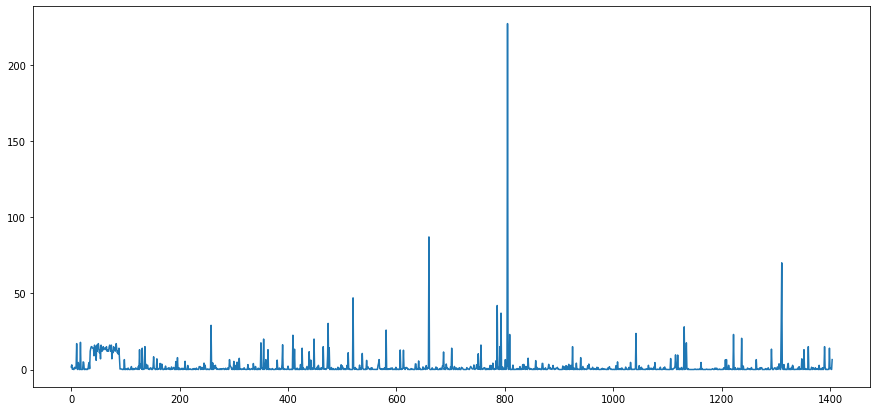

In [874]:
plt.figure(figsize=(15, 7))
plt.plot(p1_like_dislike.values())
plt.show()

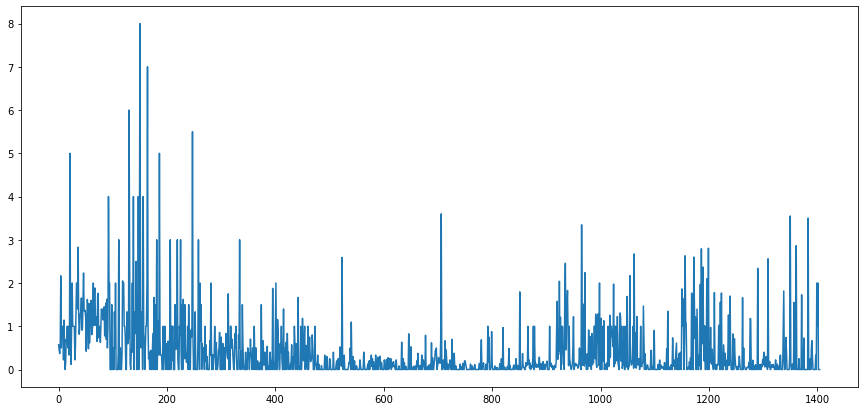

In [875]:
plt.figure(figsize=(15, 7))
plt.plot(p2_like_dislike.values())
plt.show()

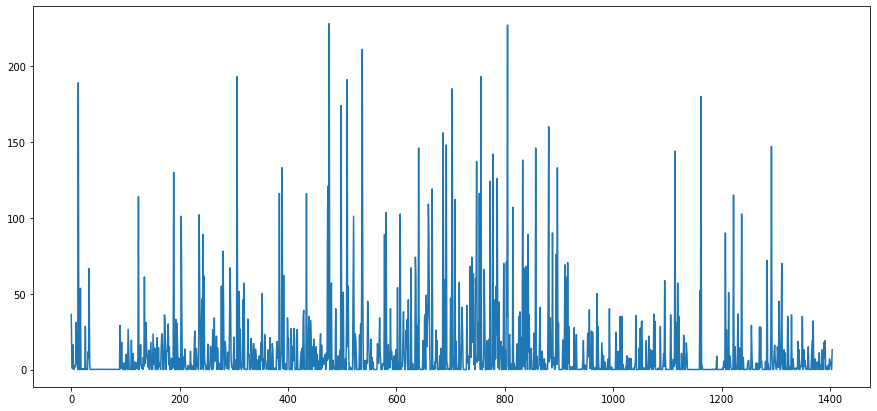

In [876]:
plt.figure(figsize=(15, 7))
plt.plot(p1_like_p2_like.values())
plt.show()

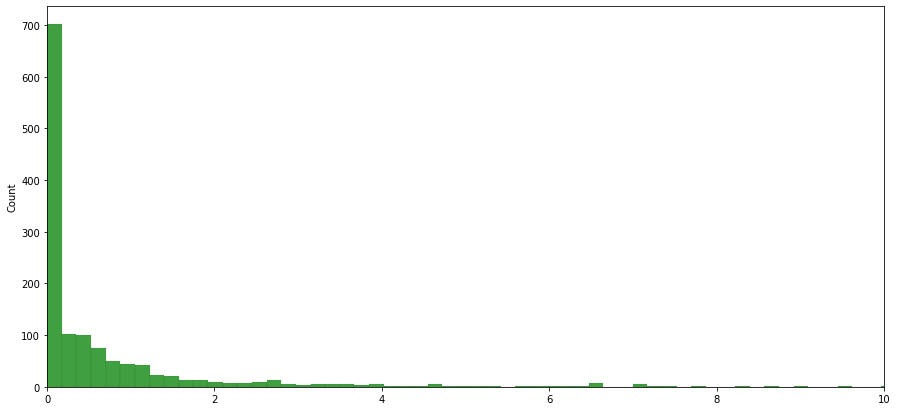

In [877]:
plt.figure(figsize=(15, 7))
import seaborn as sns
sns.histplot(list(p1_like_dislike.values()), color='g', label = 'actual')
# plt.ylim(0, 20)
plt.xlim(0, 10)
plt.show()

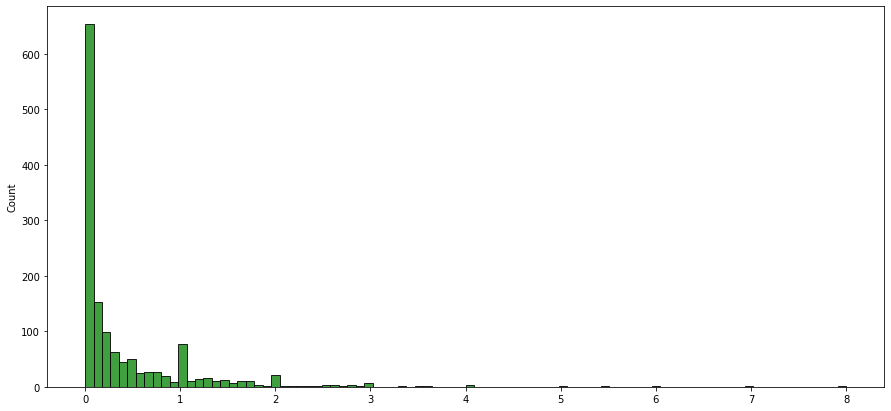

In [878]:
plt.figure(figsize=(15, 7))
import seaborn as sns
sns.histplot(list(p2_like_dislike.values()), color='g', label = 'actual')
# plt.ylim(0, 20)
# plt.xlim(0, 10)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


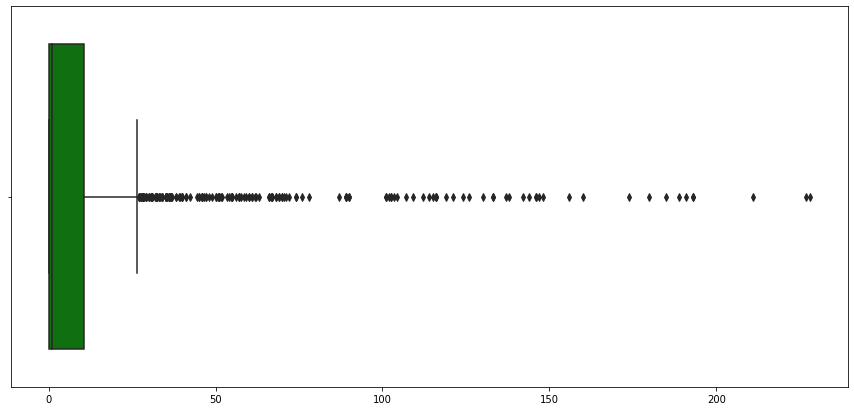

In [879]:
plt.figure(figsize=(15, 7))
import seaborn as sns
sns.boxplot(list(p1_like_p2_like.values()), color='g',)
# plt.ylim(0, 20)
# plt.xlim(0, 10)
plt.show()

In [880]:
import numpy as np

In [881]:
print(np.median(list(p1_likes.values())))
print(np.median(list(p2_likes.values())))
print(np.median(list(p1_dislikes.values())))
print(np.median(list(p2_dislikes.values())))

5.0
1.0
14.0
8.0


In [882]:
interaction = pd.DataFrame({
'p1 likes': p1_likes,
'p2 likes': p2_likes,
'p1 dislikes': p1_dislikes,
'p2 dislikes': p2_dislikes,

'p1 likes / p1 dislikes':p1_like_dislike,
'p1 likes / p2 dilikes': p2_like_dislike,
'p1 likes / p2 likes': p1_like_p2_like
})

In [883]:
from sklearn import preprocessing

In [884]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(interaction)
interaction_scaled = pd.DataFrame(x_scaled, columns=interaction.columns)
interaction_scaled.describe()

,p1 likes,p2 likes,p1 dislikes,p2 dislikes,p1 likes / p1 dislikes,p1 likes / p2 dilikes,p1 likes / p2 likes
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,0.086471,0.092128,0.046719,0.095856,0.008705,0.052459,0.053096
std,0.158171,0.208484,0.074799,0.171524,0.035160,0.091389,0.122386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.021930,0.004673,0.022491,0.027682,0.000794,0.013889,0.004386
75%,0.083333,0.018692,0.057093,0.079585,0.004315,0.062500,0.046784
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [885]:
interaction_scaled

,p1 likes,p2 likes,p1 dislikes,p2 dislikes,p1 likes / p1 dislikes,p1 likes / p2 dilikes,p1 likes / p2 likes
0,0.635965,0.018692,0.145329,0.024221,0.007515,0.071429,0.158991
1,0.228070,0.023364,0.027682,0.038062,0.013475,0.056818,0.045614
2,0.210526,0.299065,0.522491,0.602076,0.000698,0.045977,0.003289
3,0.429825,0.028037,0.219723,0.034602,0.003373,0.075000,0.071637
4,0.004386,0.060748,0.032872,0.020761,0.000220,0.270833,0.000337
...,...,...,...,...,...,...,...
1400,0.026316,0.004673,0.013841,0.000000,0.002937,0.125000,0.026316
1401,0.035088,0.009346,0.010381,0.000000,0.005035,0.250000,0.017544
1402,0.008772,0.000000,0.013841,0.003460,0.000979,0.000000,0.008772
1403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [886]:
swipes['p1'].value_counts()

11      663
1238    602
2       351
1098    318
831     276
       ... 
20        2
112       2
1142      1
1188      1
643       1
Name: p1, Length: 1055, dtype: int64

In [887]:
swipes['p2'].value_counts()

170     358
160     350
224     348
404     347
450     347
       ... 
989       1
996       1
1060      1
929       1
1385      1
Name: p2, Length: 1042, dtype: int64

In [888]:
swipes['is_unmatch'].value_counts()

False    66475
True       147
Name: is_unmatch, dtype: int64

In [889]:
swipes[swipes['is_unmatch']==1]

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
212,2023-02-08T05:13:13.430Z,LIKE,True,2,0,35,2023-02-09T06:39:18.142Z,LIKE,2023-02-11T11:31:48.390Z
9002,2023-02-09T13:26:31.608Z,LIKE,True,2,2,468,2023-02-10T02:21:28.070Z,LIKE,2023-02-13T19:27:37.333Z
30545,2023-02-14T19:54:16.975Z,LIKE,True,2,2,1029,2023-02-15T00:36:53.312Z,LIKE,2023-02-16T17:45:39.455Z
30554,2023-02-14T19:54:36.951Z,DISLIKE,True,2,2,982,2023-02-24T15:50:59.927Z,DISLIKE,2023-02-24T15:51:06.011Z
11489,2023-02-10T06:29:50.741Z,LIKE,True,2,3,259,2023-02-10T08:52:55.902Z,LIKE,2023-02-10T09:29:00.331Z
...,...,...,...,...,...,...,...,...,...
45540,2023-02-18T17:36:26.651Z,LIKE,True,2,1252,7,2023-02-21T07:31:15.678Z,LIKE,2023-02-24T07:40:33.784Z
48233,2023-02-20T03:54:31.612Z,LIKE,True,2,1270,7,2023-02-21T07:29:20.974Z,LIKE,2023-02-23T17:06:34.654Z
54698,2023-02-22T20:41:23.734Z,LIKE,True,2,1306,1238,2023-02-24T11:41:18.643Z,LIKE,2023-03-02T07:41:35.831Z
54700,2023-02-22T20:41:35.524Z,LIKE,True,2,1306,1227,2023-02-26T08:09:45.056Z,LIKE,2023-03-02T07:41:11.864Z


In [890]:
swipes['unmatch_on'] = pd.to_datetime(swipes['unmatch_on'])
swipes['first_like_unlike_at'] = pd.to_datetime(swipes['first_like_unlike_at'])
swipes['second_like_unlike_at'] = pd.to_datetime(swipes['second_like_unlike_at'])
swipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66622 entries, 212 to 66544
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   first_like_unlike_at   66622 non-null  datetime64[ns, UTC]
 1   first_type             66622 non-null  object             
 2   is_unmatch             66622 non-null  bool               
 3   like_count             66622 non-null  int64              
 4   p1                     66622 non-null  int64              
 5   p2                     66622 non-null  int64              
 6   second_like_unlike_at  4730 non-null   datetime64[ns, UTC]
 7   second_type            4730 non-null   object             
 8   unmatch_on             147 non-null    datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](3), int64(3), object(2)
memory usage: 4.6+ MB


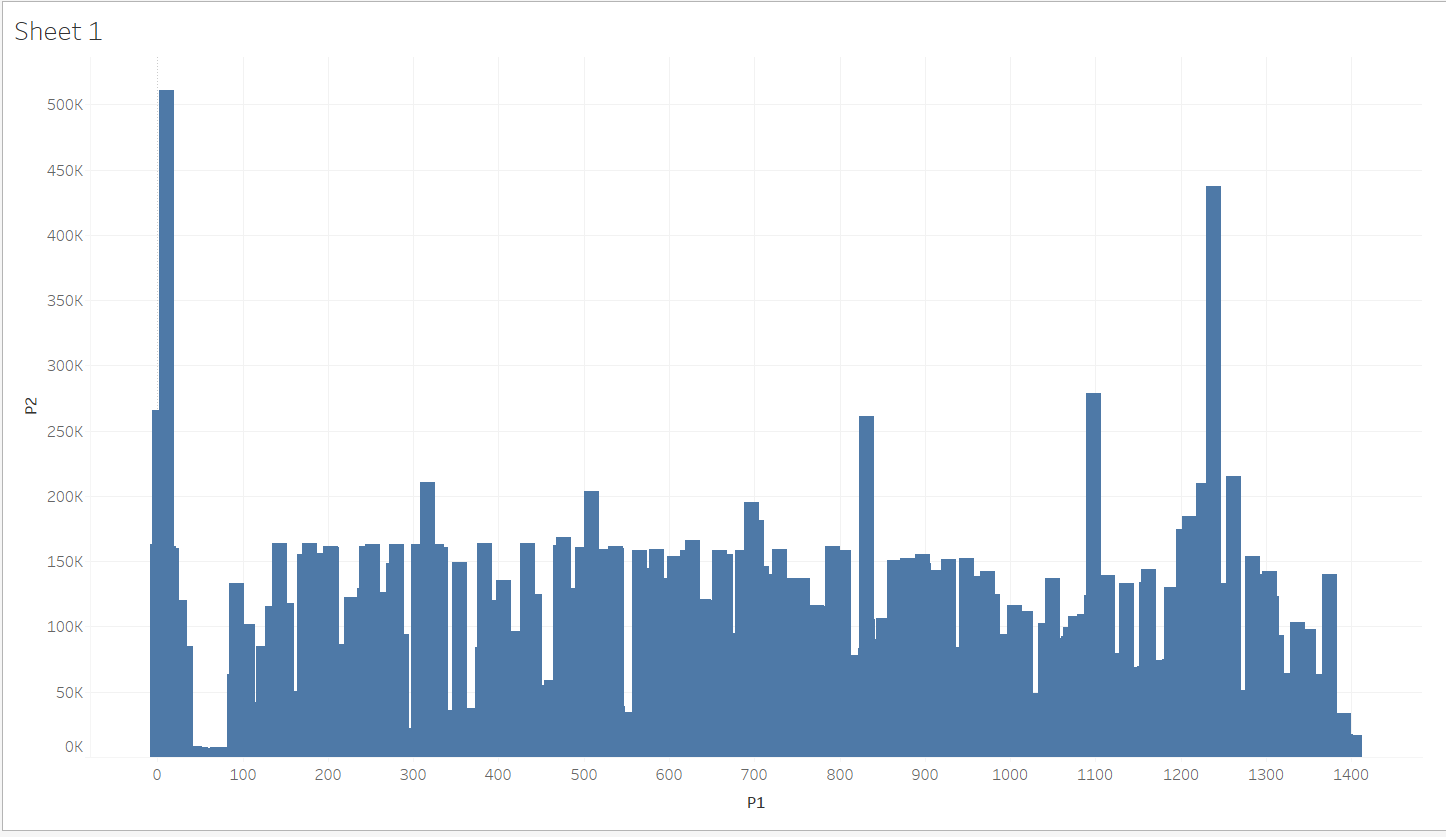

In [891]:
swipes.head()

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
212,2023-02-08 05:13:13.430000+00:00,LIKE,True,2,0,35,2023-02-09 06:39:18.142000+00:00,LIKE,2023-02-11 11:31:48.390000+00:00
213,2023-02-08 05:13:24.752000+00:00,LIKE,False,1,0,36,NaT,NaN,NaT
214,2023-02-08 05:13:33.234000+00:00,LIKE,False,2,0,37,2023-02-09 06:40:14.134000+00:00,LIKE,NaT
215,2023-02-08 05:13:41.509000+00:00,DISLIKE,False,1,0,38,NaT,NaN,NaT
216,2023-02-08 05:13:46.215000+00:00,DISLIKE,False,1,0,39,NaT,NaN,NaT


swipes.csv - Dataset of ~60k swipes by profiles.

id - Primary ID of the swipe or match

p1 - Primary ID of the first person performing the swipe. If A swipes B then p1 is A

p2 - Primary ID of the person who was swiped by p1. If A swipes B then p2 is B

first_type - LIKE or DISLIKE performed by p1

is_unmatch - If the match was unmatched by any user.

unmatch_on - Timestamp of unmatch

like_count - 1 if single swipe is done. 2 if both have swiped each other

second_type - LIKE or DISLIKE performed by p2 (Only present if like_count is 2) and 2nd user performed the action.

p1_extend_at and p2_extend_at are irrelevant.

In [892]:
swipes[swipes['p1']==1]

,first_like_unlike_at,first_type,is_unmatch,like_count,p1,p2,second_like_unlike_at,second_type,unmatch_on
7376,2023-02-09 07:24:46.746000+00:00,LIKE,False,1,1,385,NaT,NaN,NaT
7377,2023-02-09 07:24:51.520000+00:00,LIKE,False,1,1,160,NaT,NaN,NaT
7379,2023-02-09 07:24:54.276000+00:00,LIKE,False,1,1,77,NaT,NaN,NaT
7384,2023-02-09 07:25:08.552000+00:00,LIKE,False,1,1,73,NaT,NaN,NaT
7385,2023-02-09 07:25:10.423000+00:00,LIKE,False,1,1,321,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...
64510,2023-03-01 12:13:03.699000+00:00,DISLIKE,False,1,1,1337,NaT,NaN,NaT
64511,2023-03-01 12:13:06.092000+00:00,LIKE,False,1,1,523,NaT,NaN,NaT
64512,2023-03-01 12:13:08.077000+00:00,LIKE,False,1,1,924,NaT,NaN,NaT
64513,2023-03-01 12:13:14.760000+00:00,LIKE,False,1,1,1290,NaT,NaN,NaT


In [893]:
profiles=[]
for i in range(1405):
  temp=swipes[swipes['p1']==i]
  profiles.append(temp)

In [894]:
print(profiles[0])

                  first_like_unlike_at first_type  is_unmatch  like_count  p1  \
212   2023-02-08 05:13:13.430000+00:00       LIKE        True           2   0   
213   2023-02-08 05:13:24.752000+00:00       LIKE       False           1   0   
214   2023-02-08 05:13:33.234000+00:00       LIKE       False           2   0   
215   2023-02-08 05:13:41.509000+00:00    DISLIKE       False           1   0   
216   2023-02-08 05:13:46.215000+00:00    DISLIKE       False           1   0   
...                                ...        ...         ...         ...  ..   
62883 2023-02-27 20:40:44.524000+00:00       LIKE       False           1   0   
62884 2023-02-27 20:40:48.367000+00:00       LIKE       False           1   0   
62885 2023-02-27 20:40:55.653000+00:00    DISLIKE       False           1   0   
63877 2023-02-28 19:51:48.800000+00:00    DISLIKE       False           1   0   
63878 2023-02-28 19:52:01.085000+00:00    DISLIKE       False           1   0   

         p2            seco

In [895]:
score=0
users.head()

,_id,bio,college,country,createdAt,dob,email,face_detection_probabilities,gender,height,...,is_verified,mobile,name,status,type,updatedAt,verified_at,what_to_find,who_to_date,is_subscribed
0,0,I am very honest and caring person,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:23:18.004Z,2002-07-16T00:00:00.000Z,9000000000@get.idyll,[90.7028079032898],M,175.0,...,True,9000000000,Prakhar Sharma,True,U,2023-02-22T11:57:08.616Z,2023-02-22T11:57:04.347Z,C,F,True
1,1,Let's go on a date.,"[""Heritage ""]",IN,2023-02-07T05:44:15.450Z,1999-02-26T00:00:00.000Z,9100000000@get.idyll,[],M,177.0,...,True,9100000000,Amit,True,U,2023-02-21T18:07:44.286Z,2023-02-21T18:01:34.165Z,C,F,True
2,2,Loving life,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:57:29.233Z,2001-01-08T00:00:00.000Z,9200000000@get.idyll,[88.67224454879761],F,175.0,...,True,9200000000,Ritz,True,U,2023-02-14T10:33:13.373Z,NaN,R,M,True
3,3,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...,"[""Jawaharlal Nehru University""]",IN,2023-02-07T06:04:39.836Z,2000-08-20T00:00:00.000Z,9300000000@get.idyll,"[90.63367247581482,70.43942511081696,96.189951...",M,177.0,...,True,9300000000,Devesh Shukla,True,U,2023-02-26T20:28:11.956Z,NaN,R,F,True
4,4,🙄,"[""Jawaharlal Nehru University""]",IN,2023-02-07T07:05:14.605Z,2000-07-31T00:00:00.000Z,9400000000@get.idyll,NaN,M,178.0,...,False,9400000000,Aditya bhadoriya,True,U,2023-02-07T07:09:17.627Z,NaN,NS,A,NaN


In [896]:
users['verified_at'].notna()

0        True
1        True
2       False
3       False
4       False
        ...  
1400    False
1401    False
1402    False
1403    False
1404    False
Name: verified_at, Length: 1405, dtype: bool

In [897]:
users.iloc[0, :].notna().sum()

23

In [898]:
matches={}

for i in range(0,1405):
  count=0
  # print(profiles1[i])
  df=profiles[i]
  for j in range(len(df)):

      if df['first_type'].iloc[j]=="LIKE" and df['second_type'].iloc[j]=="LIKE":
        count+=1
  matches[i]=count

print(matches[0])

12


In [899]:
users['matches'] = matches.values()

In [900]:
users['interests'].iloc[0].split(',')

['["Art & Craft"', '"Bollywood"', '"Comedy"', '"Design"', '"Badminton"]']

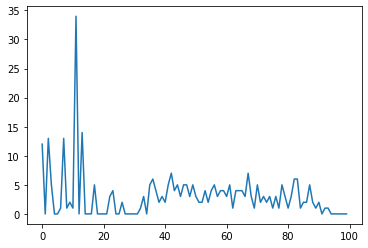

In [901]:
plt.plot(list(matches.values())[:100])

## User Cleaning

In [902]:
len(['bio', 'college', 'dob',
       'face_detection_probabilities', 'gender', 'height',
       'interests', 'is_habit_drink', 'is_habit_smoke',
       'what_to_find', 'who_to_date'])

11

In [903]:
complete_profile_cols = ['']

In [904]:
users_relevant = ['createdAt', 'gender', 'interests' , 'is_verified', 'status', 'updatedAt', 'who_to_date', 'is_subscribed']

In [905]:
users_df = users[users_relevant]
users_df

,createdAt,gender,interests,is_verified,status,updatedAt,who_to_date,is_subscribed
0,2023-02-07T05:23:18.004Z,M,"[""Art & Craft"",""Bollywood"",""Comedy"",""Design"",""...",True,True,2023-02-22T11:57:08.616Z,F,True
1,2023-02-07T05:44:15.450Z,M,"[""Singing"",""Writing"",""Dancing"",""Mountains"",""Bi...",True,True,2023-02-21T18:07:44.286Z,F,True
2,2023-02-07T05:57:29.233Z,F,"[""Badminton"",""Design"",""Writing"",""Open-Minded"",...",True,True,2023-02-14T10:33:13.373Z,M,True
3,2023-02-07T06:04:39.836Z,M,"[""Singing"",""Cricket"",""Concerts"",""Vegetarian"",""...",True,True,2023-02-26T20:28:11.956Z,F,True
4,2023-02-07T07:05:14.605Z,M,"[""Football"",""Gym"",""Biryani"",""Sci-fi"",""Cricket""]",False,True,2023-02-07T07:09:17.627Z,A,NaN
...,...,...,...,...,...,...,...,...
1400,2023-03-03T09:53:01.297Z,M,"[""Documentaries"",""Reels"",""Dancing""]",False,True,2023-03-03T09:58:15.338Z,F,NaN
1401,2023-03-03T12:43:15.149Z,M,"[""Rock"",""Vegetarian""]",False,True,2023-03-03T15:30:05.813Z,F,NaN
1402,2023-03-03T12:43:15.633Z,M,"[""Bollywood"",""EDM"",""Coffee"",""Football"",""Biryani""]",False,True,2023-03-03T15:10:17.314Z,F,NaN
1403,2023-03-03T16:12:31.677Z,M,[],False,True,2023-03-03T16:22:51.150Z,F,NaN


In [906]:
users_df["interests"][0]

'["Art & Craft","Bollywood","Comedy","Design","Badminton"]'

In [907]:
users_df.isnull().sum()

createdAt          0
gender           147
interests          2
is_verified        1
status             0
updatedAt          0
who_to_date      215
is_subscribed    848
dtype: int64

In [908]:
users_df['status'].sum()

1113

In [909]:
users_df  = users_df.drop(users_df[users_df.status==False].index)

In [910]:
users_df.isnull().sum()

createdAt          0
gender           120
interests          0
is_verified        0
status             0
updatedAt          0
who_to_date      152
is_subscribed    767
dtype: int64

In [911]:
users_df  = users_df [users_df ['gender'].notna()]

In [912]:
users_df['who_to_date'].fillna("A", inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [913]:
users_df.head()

,createdAt,gender,interests,is_verified,status,updatedAt,who_to_date,is_subscribed
0,2023-02-07T05:23:18.004Z,M,"[""Art & Craft"",""Bollywood"",""Comedy"",""Design"",""...",True,True,2023-02-22T11:57:08.616Z,F,True
1,2023-02-07T05:44:15.450Z,M,"[""Singing"",""Writing"",""Dancing"",""Mountains"",""Bi...",True,True,2023-02-21T18:07:44.286Z,F,True
2,2023-02-07T05:57:29.233Z,F,"[""Badminton"",""Design"",""Writing"",""Open-Minded"",...",True,True,2023-02-14T10:33:13.373Z,M,True
3,2023-02-07T06:04:39.836Z,M,"[""Singing"",""Cricket"",""Concerts"",""Vegetarian"",""...",True,True,2023-02-26T20:28:11.956Z,F,True
4,2023-02-07T07:05:14.605Z,M,"[""Football"",""Gym"",""Biryani"",""Sci-fi"",""Cricket""]",False,True,2023-02-07T07:09:17.627Z,A,NaN


In [914]:
users_df['interests'] = users_df['interests'].apply(lambda x: x.split(','))

<ipython-input-914-b135539cf460>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df['interests'] = users_df['interests'].apply(lambda x: x.split(','))


In [915]:
users_df.head()

,createdAt,gender,interests,is_verified,status,updatedAt,who_to_date,is_subscribed
0,2023-02-07T05:23:18.004Z,M,"[[""Art & Craft"", ""Bollywood"", ""Comedy"", ""Desig...",True,True,2023-02-22T11:57:08.616Z,F,True
1,2023-02-07T05:44:15.450Z,M,"[[""Singing"", ""Writing"", ""Dancing"", ""Mountains""...",True,True,2023-02-21T18:07:44.286Z,F,True
2,2023-02-07T05:57:29.233Z,F,"[[""Badminton"", ""Design"", ""Writing"", ""Open-Mind...",True,True,2023-02-14T10:33:13.373Z,M,True
3,2023-02-07T06:04:39.836Z,M,"[[""Singing"", ""Cricket"", ""Concerts"", ""Vegetaria...",True,True,2023-02-26T20:28:11.956Z,F,True
4,2023-02-07T07:05:14.605Z,M,"[[""Football"", ""Gym"", ""Biryani"", ""Sci-fi"", ""Cri...",False,True,2023-02-07T07:09:17.627Z,A,NaN


In [916]:
users_df[users_df.index==170]

,createdAt,gender,interests,is_verified,status,updatedAt,who_to_date,is_subscribed
170,2023-02-08T15:48:00.207Z,F,"[[""Anime"", ""Manga"", ""LGBTQIA+ ally"", ""Singing""...",False,True,2023-02-08T15:53:52.457Z,M,True


In [917]:
users_df['is_subscribed'].value_counts()

True    346
Name: is_subscribed, dtype: int64

In [918]:
comp100_profile = ['bio', 'college', 'dob', 'face_detection_probabilities', 'gender', 'height', 'interests', 'is_habit_drink', 'is_habit_smoke', 'what_to_find', 'who_to_date']

In [919]:
users.head()

,_id,bio,college,country,createdAt,dob,email,face_detection_probabilities,gender,height,...,mobile,name,status,type,updatedAt,verified_at,what_to_find,who_to_date,is_subscribed,matches
0,0,I am very honest and caring person,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:23:18.004Z,2002-07-16T00:00:00.000Z,9000000000@get.idyll,[90.7028079032898],M,175.0,...,9000000000,Prakhar Sharma,True,U,2023-02-22T11:57:08.616Z,2023-02-22T11:57:04.347Z,C,F,True,12
1,1,Let's go on a date.,"[""Heritage ""]",IN,2023-02-07T05:44:15.450Z,1999-02-26T00:00:00.000Z,9100000000@get.idyll,[],M,177.0,...,9100000000,Amit,True,U,2023-02-21T18:07:44.286Z,2023-02-21T18:01:34.165Z,C,F,True,0
2,2,Loving life,"[""Jawaharlal Nehru University""]",IN,2023-02-07T05:57:29.233Z,2001-01-08T00:00:00.000Z,9200000000@get.idyll,[88.67224454879761],F,175.0,...,9200000000,Ritz,True,U,2023-02-14T10:33:13.373Z,NaN,R,M,True,13
3,3,Jai Maharashtra\n🥲Bharat Mata ki Jay.....\nInq...,"[""Jawaharlal Nehru University""]",IN,2023-02-07T06:04:39.836Z,2000-08-20T00:00:00.000Z,9300000000@get.idyll,"[90.63367247581482,70.43942511081696,96.189951...",M,177.0,...,9300000000,Devesh Shukla,True,U,2023-02-26T20:28:11.956Z,NaN,R,F,True,5
4,4,🙄,"[""Jawaharlal Nehru University""]",IN,2023-02-07T07:05:14.605Z,2000-07-31T00:00:00.000Z,9400000000@get.idyll,NaN,M,178.0,...,9400000000,Aditya bhadoriya,True,U,2023-02-07T07:09:17.627Z,NaN,NS,A,NaN,0


In [920]:
def existing_score():
  scores = {}
  for i in range(1405):
      score = 0
      if users['verified_at'].iloc[i]:
          score += 10
      
      if users['is_subscribed'].iloc[i]:
          score += 20
      
      # score += 5
      score += users[comp100_profile].iloc[i, :].notna().sum()

      score += min(matches[i] * 2, 10)

      score += min(interaction_scaled.iloc[i, 0] * 100, 10) #P1
      score += min(interaction_scaled.iloc[i, 1] * 100, 10) #P2

      score += min(interaction_scaled.iloc[i, 2] * 100, 10) #P1 - DIS
      score -= min(interaction_scaled.iloc[i, 3] * 100, 10) #P2 - DIS

      score += min((interaction_scaled.iloc[i, 1] + interaction_scaled.iloc[i, 0]) * 100, 5)

      # score += len(users['interests'].iloc[i].split(','))
    
      scores[i] = score
  return scores

In [921]:
users['score'] = existing_score().values()

In [922]:
import random

In [923]:
def new_score():
  score= 0
  if users['verified_at'].iloc[i]:
      score+= 20
  
  if users['is_subscribed'].iloc[i]:
      score += 30

  if users['face_detection_probabilities'].iloc[i]!=np.nan:
    score+=10
  n=random.randint(0,1404)
  cos=int(similarity[i][n]*30)
  score+=min(cos,20)

  return score

#Final score bases reccommendation

In [924]:
users.columns

Index(['_id', 'bio', 'college', 'country', 'createdAt', 'dob', 'email',
       'face_detection_probabilities', 'gender', 'height', 'insta_username',
       'interests', 'is_habit_drink', 'is_habit_smoke', 'is_verified',
       'mobile', 'name', 'status', 'type', 'updatedAt', 'verified_at',
       'what_to_find', 'who_to_date', 'is_subscribed', 'matches', 'score'],
      dtype='object')

In [925]:
assert False

SyntaxError: ignored

In [942]:
def recommend_profiles(profile_score, num_recommendations):
    # Get the latest 100 profiles
    # users['createdAt'] = pd.to_datetime(users['createdAt'])
    latest_profiles = users['createdAt'].sort_values(ascending=False)[:100]

    # print(latest_profiles)
    # Shuffle the profiles
    random.shuffle(list(latest_profiles))
    
    # Calculate the score range for the user
    score_range = (profile_score - 15, profile_score + 15)

    # Filter the profiles based on score range
    # print(latest_profiles.index[0])
    # print(users.iloc[latest_profiles.iloc[0]].index)
    # print(users['score'].iloc[1] >= score_range[0] and users['score'].iloc[1] <= score_range[1])
    filtered_profiles = list(filter(lambda x: users['score'].iloc[x] >= score_range[0] and users['score'].iloc[x] <= score_range[1], latest_profiles.index))
    
    # Sort the profiles by match count in ascending order
    # print(filtered_profiles)
    sorted_profiles = sorted(filtered_profiles, key=lambda x: users['matches'].iloc[x])
    
    # Add a bias towards free accounts and low match counts
    biased_profiles = []
    for profile in sorted_profiles:
        if users['is_subscribed'].iloc[profile] == False:
            # Add free accounts multiple times to increase visibility
            biased_profiles += [profile] * 2

        elif users['matches'].iloc[profile] <= 1:
            # Add profiles with low match counts multiple times to increase visibility
            biased_profiles += [profile] * 2
        else:
            biased_profiles.append(profile)
    
    # Take the top num_recommendations profiles
    recommended_profiles = biased_profiles[:num_recommendations]
    
    return recommended_profiles

In [943]:
rec=recommend_profiles(70,10)
rec
# latest_profiles = users['createdAt'].sort_values()


[1391, 1391, 1369, 1369, 1367, 1367, 1357, 1357, 1349, 1349]

In [944]:
users.columns

Index(['_id', 'bio', 'college', 'country', 'createdAt', 'dob', 'email',
       'face_detection_probabilities', 'gender', 'height', 'insta_username',
       'interests', 'is_habit_drink', 'is_habit_smoke', 'is_verified',
       'mobile', 'name', 'status', 'type', 'updatedAt', 'verified_at',
       'what_to_find', 'who_to_date', 'is_subscribed', 'matches', 'score'],
      dtype='object')

In [945]:
similarity

array([[1.        , 0.22941573, 0.38949042, ..., 0.        , 0.        ,
        0.        ],
       [0.22941573, 1.        , 0.30316953, ..., 0.        , 0.        ,
        0.        ],
       [0.38949042, 0.30316953, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [951]:
import pickle

def storeData():
	dbfile = open('/content/simlilarity.plk', 'wb')
	
	# source, destination
	pickle.dump(similarity, dbfile)					
	dbfile.close()

def loadData():
	# for reading also binary mode is important
	dbfile = open('/content/simlilarity.plk', 'rb')	
	db = pickle.load(dbfile)
	for keys in db:
		print(keys, '=>', db[keys])
	dbfile.close()

if __name__ == '__main__':
	storeData()
	# loadData()


In [ ]:
def recommend(id):
    user_index=new_df[new_df['_id']==id].index[0]
    distances=similarity[user_index]
    user_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:11]
    if id>1404:
      scores_new=new_score()  #pass parameters adn func 
    else:
      existing_score=existing_score()
    


    for i in user_list:
        print(new_df.iloc[i[0]].name)

recommend(4)